# Numerical analysis


## More difficult example ##
In the above, the friction force was proportional to the velocity. What if we make the force more realistic? For instance, let's consider a small hail stone that comes falling out of the sky. We will assume that the hail stone is formed in a cloud at a height of 1km above the ground. Furthermore, we will take that the stone drops from that height with zero initial velocity. Finally, we will assume that the problem is 1-dimensional: the hail stone drops vertically down and experiences only gravity, buoyancy and air-friction. The situation is sketched in {numref}`fig:HailStoneFriction`.

```{figure} images/HailStoneFriction.png
---
name: fig:HailStoneFriction
width: 50%
align: center
--- 
Force acting on a hailstone. 
```


There are three forces acting on the hail stone: gravity, $F_g = - mg = \rho_p V_p g$, buoyancy, $F_b = \rho_{air} V_p g$ and air friction. The latter can not be written down from a first-principles argument. We have to use here an empirical relation. We will use (taken the hail stone as a spherical particle with diameter $D$):

```{math}
:label: eq:3.1

F_f = -C_D \frac{\pi}{4}D^2 \frac{1}{2}\rho_{air} |v| v
```

with $C_D$ the so-called drag coefficient that can be approximated by e.g.

```{math}
:label: eq:3.2
C_D = \frac{24}{Re} \left ( 1 + 0.15 Re^{0.678} \right)
```

and

```{math}
:label: eq:3.3
Re = \frac{\rho_{air} v D}{\mu_{air}}
```

$\rho_{air} = 1.2 kg/m^3$ is the density of air and $\mu_{air} = 1.8 10^{-5} kg/(m\cdot s)
$ the viscosity of air.

So, we have to deal with a much more complicated expression for the friction force, making integration of N2 virtually impossible. However, a numerical approach does not change by much. Now we have to evaluate a more complex friction force, but the entire approach remains the same.

Note, that for $Re<1$ the friction force tends to $F_f \propto -v$ as we had in the previous example. Therefor, we will compare our numerical solution with the analytic one that assumes that the friction force is proportional to $v$.

```{tip} Insert
python code for calculating and plotting the velocity of a falling hail stone as a function of time (initially at rest) / comparison with no-friction case
```


```

```{glue:figure} HailStone
---
name: fig:HailStone

---
Velocity of a hail stone falling from 1km height taking air friction into account.
```

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
## Exercises ##

```{exercise}
:label: 31


A point particle of mass m, feels a force $F(x) = - F_0 \;\text{ sign}(x) \; e^{-|x|/L}$.
Here, $\text{sign}(x)$ denotes the 'sign-function'. It is +1 for $x>0$, -1 for $x<0$ and 0 for $x=0$.

The particle is at $t=0$ at $x=0$ and has a velocity $v(0) = v_0$.

Write a simulation that determines the position of the particle as a function of time: $x(t)$. The problem is 1-dimensional. Take $m=1 kg, L=1m, F_0 = 2N$ and vary $v_0$ between 1.5 and 2.5m/s. Set the value of $dt$ in your code to 0.001 (s) and simulate about 60 seconds. 

Inspect what happens for initial values of the velocity around 2 m/s. Any clue what this means? If not: don't worry. You will get the 'tools' when we discuss work and energy.

```



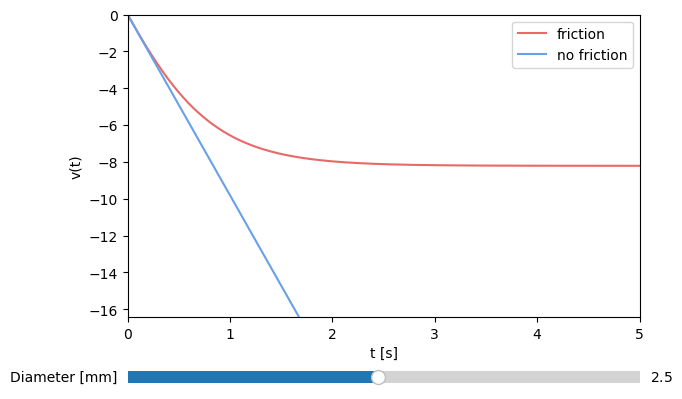

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

################ Code used for physics ################
# Define constants
rho_p   = 915
rho_air = 1.2
mu_air  = 1.8e-5
H       = 1e3
g       = 9.813
v0      = 0
z0      = H
dt      = 1e-2
Ndata   = 501

def recalc(D):
    m   = np.pi/6 * D**3 * rho_p
    A   = np.pi/4 * D**2
    Vol = np.pi/6 * D**3
    return m, A, Vol

def CD(v,D):
    Re = rho_air * np.abs(v) * D / mu_air
    if Re < 1e-6:
        Re = 1e-6
    return 24./Re*(1 + 0.15 * Re**0.678 )

def force(v,D,m,Vol,A):
    return -m*g + rho_air*Vol*g - CD(v,D)*A*0.5*rho_air*np.abs(v)*v

def velo(D):
    m, A, Vol = recalc(D)
    v, v_nofriction, z, t = [v0], [v0], [z0], [0]
    for teller in range(1, Ndata+1):
        t.append(teller*dt)
        v_new = v[-1] + force(v[-1],D,m,Vol,A)/m*dt
        z_new = z[-1] + v_new * dt
        v.append(v_new)
        z.append(z_new)
        v_nofriction.append(-g*teller*dt)
    return np.array(t), np.array(v), np.array(v_nofriction)

################ Interactive Plot with matplotlib ################
# Initial diameter in meters
D_init = 2.5e-3
t, v, v_nofriction = velo(D_init)

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, bottom=0.25)

line1, = ax.plot(t, v, label='friction', color='#e96868')
line2, = ax.plot(t, v_nofriction, label='no friction', color='#68a0e9')

ax.set_xlabel('t [s]')
ax.set_ylabel('v(t)')
ax.set_xlim(0, 5)
ax.set_ylim(2 * np.min(v), 0)
ax.legend()

# Slider setup
ax_diam = plt.axes([0.1, 0.1, 0.8, 0.05], facecolor='lightgoldenrodyellow')
diam_slider = Slider(ax_diam, 'Diameter [mm]', 0.1, 5.0, valinit=2.5, valstep=0.1)

def update(val):
    D = diam_slider.val * 1e-3
    t, v, v_nofriction = velo(D)
    line1.set_ydata(v)
    line2.set_ydata(v_nofriction)
    ax.set_ylim(2 * np.min(v), 0)
    fig.canvas.draw_idle()

diam_slider.on_changed(update)

plt.show()


````{exercise}
:label: 32

In the examples so far, we looked at 1-dimensional problems, for instance, the falling hail stone. Given the expression for the drag force with the algebraic formula for the drag coefficient, an analytical approach could be tried, although a numerical one turned out to be straightforward. This changes, when we deal with a 2-dimensional trajectory.

The standard classical mechanical example is that of the 'canon ball': a point mass of mass m is shot into the air from $z=0$ with initial velocity $v_0$ at an angle $\alpha$ with the horizontal. The only force taken into account is gravity and the question is: "at what value does the ball travel furthest?" This is a 2-dimensional, which makes it in principle more complicated. However, in this case, the equations for the motion in the horizontal and vertical direction are uncoupled and can be solved separately. it is relatively simple to show that the path is longest at $\alpha = 45^\circ$, independent of the initial velocity of the ball.

```{figure} images/Kogelbaan.png
---
name: fig:Kogelbaan
width: 70%
align: center
--- 
```

But what if we do take air friction into account? The equation of motion is:

$$m\frac{d\vec{v}}{dt} = -m\vec{g} - C_D \frac{\pi}{4}D^2 \frac{1}{2} \rho_{air} v \vec{v} $$

and we use for the drag coefficient, just like before:

```{math}
:label: eq:3.4

C_D = \frac{24}{Re} \left ( 1 + 0.15 Re^{0.678} \right)
```

and

```{math}
:label: eq:3.5

Re = \frac{\rho_{air} v D}{\mu_{air}}
```

$\rho_{air} = 1.2 kg/m^3$ is the density of air and $\mu_{air} = 1.8 10^{-5} kg/(m\cdot s)
$ the viscosity of air.

But now, the problem is two dimensional and the two directions are coupled! This is a consequence of the quadratic nature of the friction force: it contains the value of the velocity, that is both components:

$$ \begin{split}
F_{f,x} &= -C_D(v) \frac{\pi}{4}D^2 \frac{1}{2} \rho_{air} v . v_x \\
F_{f,y} &= -C_D(v) \frac{\pi}{4}D^2 \frac{1}{2} \rho_{air} v . v_y
\end{split} $$

This makes analytical solution rather difficult. However, with a numerical approach, the same ideas as for a 1-d case can be used and extension is straight forward.

Write a computer code for the case of a spherical sand particle of 1 mm (density 2.5 10$^3$ kg/m$^3$) that is shot at 10m/s at an angle $0 \lt \alpha \lt 90^\circ$ with the horizontal and find the maximum distance it can travel (and the angle at which that happens).

You should find something like shown in the graph below.

```{figure} images/Kogelbaanfrictie.png
---
name: fig:Kogelbaanfrictie
width: 70%
align: center
--- 
```
````



```{exercise}
:label: 33
```

A pendulum is by most people known for its 'clock work'. In old fashioned clocks it swings back and force at a constant period. The small friction it encounters is balanced by a driving force, usually coming from weights that slowly move downwards due to gravity.

However, a pendulum can show complex motion if the driving force is not a constant. A very simple example is a pendulum, that experiences some friction that is linearly related to the velocity of the bob and a driving force that is a cosine of time. Mathematically, this can be described by the following equation of motion:

$$m \ddot{x} = -\gamma \dot{x}  - \alpha \sin (x) + A \cos (2\pi ft) $$

If we analyse this equation, we see on the left hand side 'ma' and on the right hand side the forces. That is: friction, the effect of gravity and the driving force. In the current exercise, we set:

$$ \gamma = 0.1 s^{-1}, \alpha = 1 rad/s^2, A = 1 rad/s^2 \text{ and } 2\pi f = 1 s^{-1} $$

This symplifies the equation of motion to

$$\ddot{x} = -0.1 \dot{x} - \sin (x) + \cos (t) $$

The initial conditions are: $x(0) = 0$ and $\dot{x}(0) = 2.0 $

Write a numerical code that solves the above problem and plot $x(t)$ for different values of $\dot{x}(0)$, namely 1,8, 1.9, 2.0, 2.1, 2.2.

You will experience, that small changes in the initial condition have large consequences for the trajectory $x(t)$, which is a characteristic of chaotic systems. And indeed, this pendulum shows chaotic behavior. It is virtually impossible to solve the equation of motion analytical, but a numerical solution is made relatively easily.

Note that for a reliable solution, better numerical schemes than the one we are using here are needed. An example of five different initial conditions giving five different solutions, but now made with higher order schemes, is given in the figure below.

```{figure} images/DrivenPendulumChaos.png
---
name: fig:DrivenPendulumChaos
width: 70%
align: center
--- 
```
```{exercise-end}
```